# Equity Modeling

In [1]:
!pip install yahoo_fin

zsh:1: /Users/marcusjohansson/Desktop/Algo_Trading/.conda/bin/pip: bad interpreter: /Users/marcusjohansson/Algo_Trading/.conda/bin/python: no such file or directory
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached urllib3-1.26.19-py2.py3-none-any.whl.metadata (49 kB)
  Using cached websockets-10.4.tar.gz (84 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached urllib3-1.26.19-py2.py3-none-any.whl (

In [2]:
!pip install yahoo_fin --upgrade

zsh:1: /Users/marcusjohansson/Desktop/Algo_Trading/.conda/bin/pip: bad interpreter: /Users/marcusjohansson/Algo_Trading/.conda/bin/python: no such file or directory


In [5]:
!pip install numpy-financial

  Using cached numpy_financial-1.0.0-py3-none-any.whl.metadata (2.2 kB)
Using cached numpy_financial-1.0.0-py3-none-any.whl (14 kB)


In [6]:
import yfinance as yf
from yahoo_fin.stock_info import get_analysts_info
import yahoo_fin.stock_info as si
import datetime as dt
import pandas as pd
import numpy as np
import numpy_financial as npf

from yahoo_fin.stock_info import get_income_statement
from yahoo_fin.stock_info import get_balance_sheet
from yahoo_fin.stock_info import get_cash_flow
from yahoo_fin.stock_info import get_dividends

# Deep fundamental analysis on a singluar company - APPLE/AAPL

In [7]:
pd.options.display.max_rows

apple = yf.Ticker('AAPL')

# get all stock info
apple.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

# Calculate the WACC for Apple

### Applying this model

WACC = (E/V x Re) + ((D/V x Rd) x (Tc))

Where:

E/V = market value of equity/total market value

Re = cost of equity

D/V = market value of debt/total market value

Rd = cost of debt

Tc = corporate tax rate

In [ ]:
# The data has been collected from https://www.boerse-frankfurt.de/anleihe/us037833dt41-apple-inc-1-125-20-25
# Except for the Face Value which was collected from: https://cbonds.com/bonds/721573/

from scipy.optimize import newton

# Manually extracted data
circulating_volume = 2250000000
face_value = 1000
coupon_rate = 1.125 / 100
closing_price = 94.87
years_to_maturity = 1  # Maturity data minus current date: 2025 - 2024 = 1

## Calculating the Yield to Maturity representing the cost of the debt

# Adjusting market price to reflect closing price before trading day
market_price = closing_price

# Define the present value function
def present_value_function(rate, face_value, coupon_rate, years_to_maturity):
    present_value = 0
    for t in range(1, years_to_maturity + 1):
        present_value += (coupon_rate * face_value) / ((1 + rate) ** t)
    present_value += face_value / ((1 + rate) ** years_to_maturity)
    return present_value

# Define the yield to maturity function
def ytm_function(rate, market_price, face_value, coupon_rate, years_to_maturity):
    present_value = present_value_function(rate, face_value, coupon_rate, years_to_maturity)
    return market_price - present_value

# Use numerical optimization to find the yield to maturity
ytm = newton(ytm_function, x0=0.05, args=(market_price, face_value, coupon_rate, years_to_maturity))

## Calculating the Market Value of debt

# Calculate present value of the bond's cash flows
present_value = ((1 - (1 / (1 + coupon_rate) ** years_to_maturity)) / coupon_rate) + (face_value / (1 + coupon_rate) ** years_to_maturity)

# Calculate market value of debt using the formula
market_value_of_debt = circulating_volume * present_value


print("Yield to Maturity:", ytm)
print("Market Value of Debt:", market_value_of_debt)


Yield to Maturity: 9.659323284494569
Market Value of Debt: 2227194066749.073


In [ ]:
treasury_yield10 = yf.Ticker("^TNX")

# get all stock info
treasury_yield10.info

{'maxAge': 86400,
 'priceHint': 4,
 'previousClose': 4.4919996,
 'open': 4.516,
 'dayLow': 4.447,
 'dayHigh': 4.516,
 'regularMarketPreviousClose': 4.4919996,
 'regularMarketOpen': 4.516,
 'regularMarketDayLow': 4.447,
 'regularMarketDayHigh': 4.516,
 'fiftyTwoWeekLow': 3.345,
 'fiftyTwoWeekHigh': 4.997,
 'fiftyDayAverage': 4.37796,
 'twoHundredDayAverage': 4.307575,
 'currency': 'USD',
 'exchange': 'CGI',
 'quoteType': 'INDEX',
 'symbol': '^TNX',
 'underlyingSymbol': '^TNX',
 'shortName': 'CBOE Interest Rate 10 Year T No',
 'longName': 'CBOE Interest Rate 10 Year T No',
 'firstTradeDateEpochUtc': -252326400,
 'timeZoneFullName': 'America/Chicago',
 'timeZoneShortName': 'CDT',
 'uuid': 'a05a9c0a-de55-3a03-90ec-ea1fa4baa719',
 'messageBoardId': 'finmb_INDEXTNX',
 'gmtOffSetMilliseconds': -18000000,
 'trailingPegRatio': None}

In [8]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'AAPL'

# Retrieve data for the company
stock = yf.Ticker(ticker_symbol)

# Calculate the risk-free rate (for cost of equity)
treasury_yield10 = yf.Ticker("^TNX")
risk_free_rate_average = (treasury_yield10.info['previousClose'])

risk_free_rate = risk_free_rate_average / 100

# Calculate the beta (for cost of equity)
beta = stock.info['beta']

# Calculate the expected return of the market (for cost of equity)
historical_data = stock.history(period="1y")
sp500_return = historical_data['Close'].pct_change().mean() * 252

# Calculate the cost of equity
cost_of_equity = risk_free_rate + beta * (sp500_return - risk_free_rate)

# Get the inputs for MVE
market_cap = stock.info['marketCap']
shares_outstanding = stock.info['sharesOutstanding']
share_price = stock.history(period='1d')['Close'].iloc[0]
diluted_shares = apple.income_stmt.loc['Diluted Average Shares'][0]

# Market Value of equity including the diluted shares
market_cap_of_equity = (shares_outstanding - diluted_shares) * share_price

print(cost_of_equity)

0.3629284833033646


/var/folders/7m/ytmvmfz93s3c3nbfx8y50kvm0000gn/T/ipykernel_9550/2639884672.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diluted_shares = apple.income_stmt.loc['Diluted Average Shares'][0]


In [ ]:
# Calculate total market value
total_market_value = market_value_of_debt + market_cap_of_equity

# Calculate debt-to-value ratio (D/V)
debt_to_value_ratio = market_value_of_debt / total_market_value

# Calculate equity-to-value ratio (E/V)
# Since E/V + D/V = 1
equity_to_value_ratio = 1 - debt_to_value_ratio

# Rd calculations
Rd = ytm / 100


In [ ]:
# Calculate WACC

# Inputs
Tc = 0.147
Rd = Rd
Re = cost_of_equity
DV = debt_to_value_ratio
EV = equity_to_value_ratio

WACC_decimal = (EV*Re) + (DV * Rd  * (1 - Tc))

WACC = WACC_decimal * 100

print(WACC_decimal)
print("WACC:", WACC)

0.08172870739525853
WACC: 8.172870739525854


# Calculate the Terminal Value

TV = fcf * (1 + g) / (d - g)

*   Terminal Value
*   fcf = free cash flow
*   d = Weighted Average Cost of Capital (WACC)
*   g = Growth Rate of the economy (mean GDP growth, mean_growth)



In [ ]:
#Load the GDP data to be used as the variable g
df = pd.read_csv('GDP.csv')
df['GDP_growth'] = df['GDP'].pct_change()
df['GDP_growth'] = df['GDP_growth'] * 100
mean_growth = df['GDP_growth'].mean()
print(f"The mean GDP growth rate is: {mean_growth}%")

The mean GDP growth rate is: 1.5645523453719479%


In [ ]:
# Define the variables
apple_cash_flow = stock.cash_flow
fcf = apple_cash_flow.loc['Free Cash Flow'][0]
d = WACC
g = mean_growth

# Terminal Value (TV)
TV = fcf * (1 + g) / (d - g)

print(f"The Terminal Value is: {TV}")

The Terminal Value is: 38646500596.49837


In [ ]:
# Get historical cash flows
cash_flows = stock.cashflow.loc['Cash Flow From Continuing Operating Activities']

# Assume a growth rate for future cash flows
dcf_growth = mean_growth / 100

# Project future cash flows for a certain period (e.g., 5 years)
future_cash_flows = [cf * (1 + dcf_growth)**i for i, cf in enumerate(cash_flows, 1)]

# Assume a discount rate
WACC_decimal = WACC_decimal

# Calculate the present value of future cash flows
present_values = [cf / (1 + WACC_decimal)**i for i, cf in enumerate(future_cash_flows, 1)]

# Sum up the present values to get the total present value of cash flows
total_pv = np.sum(present_values)

print(f"The total present value of cash flows is: {total_pv}")


The total present value of cash flows is: 360278620430.83984


In [ ]:
# Estimate the value of the company

# Present value of near-term cash flows
total_pv = total_pv
TV = TV
WACC/100
WACC_decimal = WACC/100
forecast_period = 5

# Calculate the present value of the Terminal Value
TV_pv = TV / (1 + WACC_decimal)**forecast_period

# Add the present value of the near-term cash flows and the present value of the Terminal Value
total_value = total_pv + TV_pv

print(f"The total estimated value of the company is: {total_value}")

The total estimated value of the company is: 386371283017.28485


In [ ]:
# Compare the estimated value of the company to the market value of the company

total_value = total_value
market_cap = stock.info['marketCap']

# Compare to the total estimated value
if total_value > market_cap:
    print("The company appears to be undervalued.")
elif total_value < market_cap:
    print("The company appears to be overvalued.")
else:
    print("The company appears to be fairly valued.")

The company appears to be overvalued.


# Use Option Pricing models to analyse market sentiment

In [ ]:
# Fetch options data for Apple from Yahoo Finance
# apple_ticker = yf.Ticker("AAPL")
# apple_options = apple_ticker.option_chain(apple_ticker.options[0])

# Display options chain data
# print("Call Options:")
# print(apple_options.calls)

# print("\nPut Options:")
# print(apple_options.puts)

In [ ]:
!pip install QuantLib==1.33

In [ ]:
import QuantLib as ql

In [ ]:
import datetime

# Fetch options data for Apple from Yahoo Finance
apple_ticker = yf.Ticker("AAPL")
expiration_date_str = apple_ticker.options[0]  # Select first expiration date
apple_options = apple_ticker.option_chain(expiration_date_str)

# Extract relevant options data
calls_data = apple_options.calls
puts_data = apple_options.puts

# Example: Select a specific call and put option
selected_call = calls_data.iloc[0]  # Select first call option
selected_put = puts_data.iloc[0]  # Select first put option

# Extract relevant data for QuantLib calculations
current_stock_price = apple_ticker.history(period="1d")['Close'].iloc[-1]
strike_price_call = selected_call['strike']
strike_price_put = selected_put['strike']
expiration_date = datetime.datetime.strptime(expiration_date_str, '%Y-%m-%d').date()

# Corrected lines for calculating time to expiry
today = ql.Date.todaysDate()
expiration = ql.Date(expiration_date.day, expiration_date.month, expiration_date.year)

# Calculate the time to expiry in years
time_to_expiry_days = expiration.serialNumber() - today.serialNumber()
time_to_expiry_years = time_to_expiry_days / 365.0

risk_free_rate = 0.05  # Example risk-free rate (annual)
call_price = selected_call['lastPrice']
put_price = selected_put['lastPrice']
volatility = selected_call['impliedVolatility']

# Black-Scholes calculations for call option
spot_handle = ql.QuoteHandle(ql.SimpleQuote(current_stock_price))
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(0, ql.NullCalendar(), ql.QuoteHandle(ql.SimpleQuote(risk_free_rate)), ql.Actual360()))
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(0, ql.NullCalendar(), ql.QuoteHandle(ql.SimpleQuote(volatility)), ql.Actual360()))
bs_process = ql.BlackScholesProcess(spot_handle, flat_ts, flat_vol_ts)

option_type_call = ql.Option.Call
exercise_call = ql.EuropeanExercise(ql.Date(expiration_date.day, expiration_date.month, expiration_date.year))
payoff_call = ql.PlainVanillaPayoff(option_type_call, strike_price_call)

option_call = ql.VanillaOption(payoff_call, exercise_call)
option_call.setPricingEngine(ql.AnalyticEuropeanEngine(bs_process))
option_price_call = option_call.NPV()

# Black-Scholes calculations for put option
option_type_put = ql.Option.Put
exercise_put = ql.EuropeanExercise(ql.Date(expiration_date.day, expiration_date.month, expiration_date.year))
payoff_put = ql.PlainVanillaPayoff(option_type_put, strike_price_put)

option_put = ql.VanillaOption(payoff_put, exercise_put)
option_put.setPricingEngine(ql.AnalyticEuropeanEngine(bs_process))
option_price_put = option_put.NPV()

print("Current Stock Price of Apple:", current_stock_price)
print("Option Price (Call):", option_price_call)
print("Option Price (Put):", option_price_put)



Current Stock Price of Apple: 184.57000732421875
Option Price (Call): 84.5856968811337
Option Price (Put): 0.001801632487598876


In [ ]:
import math

# Input values
current_stock_price = current_stock_price
strike_price = strike_price_put
risk_free_rate = 0.05
time_to_expiration = time_to_expiry_years
dividend_yield = apple.info['dividendYield']
option_price_put = option_price_put

# Calculate the fair value using Put-Call parity
fair_value = current_stock_price * math.exp(risk_free_rate * time_to_expiration) - strike_price * math.exp(-dividend_yield * time_to_expiration) * option_price_put

# Print the result
print("Fair Value:", fair_value)

Fair Value: 184.4151320847042


In [ ]:
import yfinance as yf
import math

# Get the Apple stock ticker
apple = yf.Ticker("AAPL")

# Get the option chain for Apple stock
option_chain = apple.option_chain()

# Get the put options
puts = option_chain.puts

# Get the strike prices of the put options
put_strike_prices = puts["strike"]

# Choose the strike price you want to use (e.g. 160)
strike_price = strike_price_put

# Get the current stock price of Apple
current_stock_price = apple.history(period="1d")["Close"][0]

# Get the put option price for the chosen strike price
option_price = puts.loc[puts['strike'] == strike_price]['lastPrice'].iloc[0]

# Calculate present value of the strike price using Put-Call parity
present_value_strike = current_stock_price - option_price

# Determine market sentiment based on the relationship between present value and actual strike price
if present_value_strike > strike_price:
    sentiment = "Bullish"
elif present_value_strike < strike_price:
    sentiment = "Bearish"
else:
    sentiment = "Neutral"

# Print the results
print("Current Stock Price of Apple:", current_stock_price)
print("Option Price (Put):", option_price)
print("Present Value of Strike Price:", present_value_strike)
print("Market Sentiment based on Put-Call parity:", sentiment)

Current Stock Price of Apple: 184.57000732421875
Option Price (Put): 0.01
Present Value of Strike Price: 184.56000732421876
Market Sentiment based on Put-Call parity: Bullish


In [ ]:
# Check if the put price is close to zero
if abs(option_price_put) < 0.05:
    # Print a message explaining the relationship with Put-Call parity
    print("The put price is close to zero, which means that the put option is not worth much. This is expected for a stock that is trading at a high price relative to its strike price. The Put-Call parity is not satisfied in this case.")


The put price is close to zero, which means that the put option is not worth much. This is expected for a stock that is trading at a high price relative to its strike price. The Put-Call parity is not satisfied in this case.


In [ ]:
# Data collected from https://s2.q4cdn.com/470004039/files/doc_earnings/2023/q4/filing/_10-K-Q4-2023-As-Filed.pdf
number_of_options_granted = 88768

fair_value_per_option = fair_value

# Calculate total stock-based compensation expense
stock_compensation_expense = number_of_options_granted * fair_value_per_option

print("Stock-Based Compensation Expense:", stock_compensation_expense)

# Example inputs for company valuation calculation
current_stock_price = current_stock_price
shares_outstanding = apple.info['sharesOutstanding']

# Calculate company valuation using current stock price and shares outstanding
company_valuation = current_stock_price * shares_outstanding

print("Company Valuation:", company_valuation)

# Example inputs for potential future stock prices calculation
risk_free_rate = 0.05
future_years = [1, 2, 3, 4, 5]

# Calculate potential future stock prices using Black-Scholes model's call price
future_stock_prices = []
for year in future_years:
    future_stock_price = current_stock_price * np.exp(risk_free_rate * year)
    future_stock_prices.append(future_stock_price)

print("Potential Future Stock Prices (Using Black-Scholes call price):", future_stock_prices)

Stock-Based Compensation Expense: 16370162.444895022
Company Valuation: 2830214943404.0625
Potential Future Stock Prices (Using Black-Scholes call price): [194.03311395786224, 203.98140444373587, 214.43975468988734, 225.43431601944354, 236.99258056253947]


In [ ]:
# Company Valuation
company_valuation = company_valuation
market_cap = apple.info['marketCap']

# Compare to the total estimated value
if company_valuation > market_cap:
    print("The company appears to be undervalued.")
elif company_future_valuation < market_cap:
    print("The company appears to be overvalued.")
else:
    print("The company appears to be fairly valued.")

The company appears to be undervalued.


In [ ]:
# Future Valuation metrics for the next five years (Forecasting year 0)
shares_outstanding = apple.info['sharesOutstanding']
market_cap = apple.info['marketCap']

company_future_valuation = future_stock_prices[0] * shares_outstanding

# Compare to the total estimated value
if company_future_valuation > market_cap:
    print("The company appears to be undervalued.")
elif company_future_valuation < market_cap:
    print("The company appears to be overvalued.")
else:
    print("The company appears to be fairly valued.")

The company appears to be undervalued.


In [ ]:
# Future Valuation metrics for the next five years (Forecasting year 1)
shares_outstanding = apple.info['sharesOutstanding']
market_cap = apple.info['marketCap']

company_future_valuation = future_stock_prices[1] * shares_outstanding

# Compare to the total estimated value
if company_future_valuation > market_cap:
    print("The company appears to be undervalued.")
elif company_future_valuation < market_cap:
    print("The company appears to be overvalued.")
else:
    print("The company appears to be fairly valued.")

The company appears to be undervalued.


In [ ]:
# Future Valuation metrics for the next five years (Forecasting year 2)
shares_outstanding = apple.info['sharesOutstanding']
market_cap = apple.info['marketCap']

company_future_valuation = future_stock_prices[2] * shares_outstanding

# Compare to the total estimated value
if company_future_valuation > market_cap:
    print("The company appears to be undervalued.")
elif company_future_valuation < market_cap:
    print("The company appears to be overvalued.")
else:
    print("The company appears to be fairly valued.")

The company appears to be undervalued.


In [ ]:
# Future Valuation metrics for the next five years (Forecasting year 3)
shares_outstanding = apple.info['sharesOutstanding']
market_cap = apple.info['marketCap']

company_future_valuation = future_stock_prices[3] * shares_outstanding

# Compare to the total estimated value
if company_future_valuation > market_cap:
    print("The company appears to be undervalued.")
elif company_future_valuation < market_cap:
    print("The company appears to be overvalued.")
else:
    print("The company appears to be fairly valued.")

The company appears to be undervalued.


In [ ]:
# Future Valuation metrics for the next five years (Forecasting year 4)
shares_outstanding = apple.info['sharesOutstanding']
market_cap = apple.info['marketCap']

company_future_valuation = future_stock_prices[4] * shares_outstanding

# Compare to the total estimated value
if company_future_valuation > market_cap:
    print("The company appears to be undervalued.")
elif company_future_valuation < market_cap:
    print("The company appears to be overvalued.")
else:
    print("The company appears to be fairly valued.")

The company appears to be undervalued.


# Credit Risk Analysis

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from scipy.stats import norm

In [ ]:
# Calculate the parameters for the 2 Credit risk model
stock_data = yf.download('AAPL', start='2013-01-02', end='2024-04-29')

# Inputs for KMV model, assuming the same face value and years to maturity as earlier in the analysis
face_value = 1000
years_to_maturity = 1

# Use the latest stock price as the asset value
asset_value = stock_data['Close'].iloc[-1]

# Calculate the annualized volatility
volatility = stock_data['Close'].rolling(window=252).std().iloc[-1]

# Calculate the Distance to default (dd)
dd = (np.log(asset_value) - np.log(face_value)) / (volatility * np.sqrt(years_to_maturity))

# Calculate the Probability of Dafault for the KMV model (pd_kmv)
pd_kmv = norm.cdf(-dd)

# Loss given default (LGD)
# For senior corporate bonds, a common LGD assumption is 75%, meaning 75% of the bond's value is expected to be lost in the event of a default.
lgd = 0.75

#Calculating Expected Loss (L)
l_kmv = pd_kmv * lgd

#Calculating Credit Risk Premium (CRP)
crp_kmv = l_kmv / (1 - pd_kmv)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(dd)
print(pd_kmv)
print(l_kmv)
print(crp_kmv)

-0.20426172512554083
0.5809255108500151
0.4356941331375113
1.0396579711192544


# IRB model for regulatory capital calculations

- This model might see use, but as this is for investment analysis is the analysis using the KMV model instead

In [ ]:
# Calculate financial ratios for IRB model
ebitda = apple.info['ebitda']
total_assets = total_market_value
total_debt = market_value_of_debt
equity = (shares_outstanding * share_price)


def calculate_pd(ebitda, total_assets, total_debt, equity):
    debt_to_equity = total_debt / equity
    interest_coverage = ebitda / (total_debt * risk_free_rate)
    pd_irb = 0.012 * (1 + (debt_to_equity - 1.5) / 2.5) * (1 + (interest_coverage - 3) / 2)
    return pd_irb

#Probability of Default (pd_irb)
pd_irb = calculate_pd(ebitda, total_assets, total_debt, equity)

# Loss given default (LGD)
lgd = lgd

#Exposure at Default (ead):
ead = total_debt

#Expected Loss (l_irb):
l_irb = pd_irb * lgd * ead

#Credit Risk Premium (crp_irb):
crp_irb = l_irb / (1 - pd_irb)

print(pd_irb)

0.0007035804322357151


# IFRS9 Credit Model

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [ ]:
#Data for the credit risk
delinquency = pd.read_csv('delinquency_rate.csv')
delinquency_df = pd.DataFrame(delinquency)
recovery = pd.read_csv('recovery_rate.csv')
recovery_df = pd.DataFrame(recovery)

In [ ]:
delinquency_df.rename(columns={'DRBLACBS':'Delinquency_rate'}, inplace=True)

In [ ]:
recovery_df.rename(columns={'USLSTL':'Recovery_rate'}, inplace=True)

In [ ]:
historical_defaults = pd.merge(delinquency_df, recovery_df, on='DATE')

In [ ]:
historical_defaults

,DATE,Delinquency_rate,Recovery_rate
0,1987-01-01,6.75,0.75
1,1987-04-01,6.75,0.80
2,1987-07-01,6.40,0.81
3,1987-10-01,6.23,0.94
4,1988-01-01,5.85,0.88
...,...,...,...
130,2019-07-01,1.12,0.47
131,2019-10-01,1.09,0.49
132,2020-01-01,1.14,0.52
133,2020-04-01,1.27,0.54


In [ ]:
# Calculate and add financial ratios into a dataframe

# Calculate financial ratios
ebitda = apple.info['ebitda']
total_assets = total_market_value
total_debt = market_value_of_debt
equity = (shares_outstanding * share_price)
apple_income_statement = stock.income_stmt
interest_expense = apple_income_statement.loc['Interest Expense Non Operating'][0]

# Financial ratios
debt_to_equity_ratio = total_debt / equity
interest_coverage_ratio = ebitda / interest_expense
ebitda_to_interest_ratio = ebitda / interest_expense

# Add these ratios to your historical_defaults DataFrame
historical_defaults['debt_to_equity_ratio'] = debt_to_equity_ratio
historical_defaults['interest_coverage_ratio'] = interest_coverage_ratio
historical_defaults['ebitda_to_interest_ratio'] = ebitda_to_interest_ratio

historical_defaults

,DATE,Delinquency_rate,Recovery_rate,debt_to_equity_ratio,interest_coverage_ratio,ebitda_to_interest_ratio
0,1987-01-01,6.75,0.75,0.786935,32.95932,32.95932
1,1987-04-01,6.75,0.80,0.786935,32.95932,32.95932
2,1987-07-01,6.40,0.81,0.786935,32.95932,32.95932
3,1987-10-01,6.23,0.94,0.786935,32.95932,32.95932
4,1988-01-01,5.85,0.88,0.786935,32.95932,32.95932
...,...,...,...,...,...,...
130,2019-07-01,1.12,0.47,0.786935,32.95932,32.95932
131,2019-10-01,1.09,0.49,0.786935,32.95932,32.95932
132,2020-01-01,1.14,0.52,0.786935,32.95932,32.95932
133,2020-04-01,1.27,0.54,0.786935,32.95932,32.95932


In [ ]:
from sklearn.linear_model import LogisticRegression

# Assume the threshold_value to be
threshold_value_pd = 3.0

# Assuming historical_defaults['Delinquency_rate'] is binary indicating default or non-default
X = historical_defaults[['debt_to_equity_ratio', 'interest_coverage_ratio', 'ebitda_to_interest_ratio']]
y_binary = (historical_defaults['Delinquency_rate'] > threshold_value_pd).astype(int)

# Initialize and fit the Logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X, y_binary)

# Estimate PD for the latest financial data using the trained model
latest_ratios = [[debt_to_equity_ratio, interest_coverage_ratio, ebitda_to_interest_ratio]]
estimated_prob_default = log_reg_model.predict_proba(latest_ratios)[:, 1]
IFRS9_pd = estimated_prob_default[0]

print(f"Estimated Probability of Default: {IFRS9_pd}")


Estimated Probability of Default: 0.32592839080092595


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

# Assume the threshold_value to be
threshold_value_lgd = 1.0

# Assuming historical_defaults['Delinquency_rate'] is binary indicating default or non-default
X = historical_defaults[['debt_to_equity_ratio', 'interest_coverage_ratio', 'ebitda_to_interest_ratio']]
y_binary = (historical_defaults['Recovery_rate'] > threshold_value_lgd).astype(int)

# Initialize and fit the Logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X, y_binary)

# Estimate PD for the latest financial data using the trained model
latest_ratios = [[debt_to_equity_ratio, interest_coverage_ratio, ebitda_to_interest_ratio]]
estimated_loss_given_default = log_reg_model.predict_proba(latest_ratios)[:, 1]
IFRS9_lgd = estimated_loss_given_default[0]

print(f"Estimated Loss Given Default: {IFRS9_lgd}")

Estimated Loss Given Default: 0.2814846722797074


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Calculate EAD based on the total debt
total_debt = apple.balance_sheet.loc['Total Debt'][0]

# Assuming the same threshold_value for delinquency rate and recovery rate
defaulted_mask = (historical_defaults['Delinquency_rate'] >= threshold_value_pd) & (historical_defaults['Recovery_rate'] < threshold_value_lgd)
defaulted_loans = historical_defaults[defaulted_mask]

# EAD estimation using total debt
ead = total_debt * len(defaulted_loans)

print(f"Estimated Exposure at Default (ead): {ead}")

Estimated Exposure at Default (ead): 1999584000000.0


In [ ]:
# Calculate Expected Credit Loss (ECL)
ecl = IFRS9_lgd * IFRS9_pd * ead
print(f"The Estimated Expected Credit Loss is: {ecl}")

The Estimated Expected Credit Loss is: 183449527102.45325


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Prepare the data for each component
X_pd = historical_defaults[['debt_to_equity_ratio', 'interest_coverage_ratio', 'ebitda_to_interest_ratio']]
y_pd = (historical_defaults['Delinquency_rate'] > threshold_value_pd).astype(int)

X_lgd = historical_defaults[['debt_to_equity_ratio', 'interest_coverage_ratio', 'ebitda_to_interest_ratio']]
y_lgd = (historical_defaults['Recovery_rate'] > threshold_value_lgd).astype(int)

total_debt = apple.balance_sheet.loc['Total Debt'][0]
defaulted_mask = (historical_defaults['Delinquency_rate'] >= threshold_value_pd) & (historical_defaults['Recovery_rate'] < threshold_value_lgd)
ead = total_debt * len(historical_defaults[defaulted_mask])

# Step 2: Train XGBoost models for each component
xgb_pd = xgb.XGBClassifier()
xgb_pd.fit(X_pd, y_pd)

xgb_lgd = xgb.XGBClassifier()
xgb_lgd.fit(X_lgd, y_lgd)

# Step 3: Make predictions using the trained models
latest_ratios = [[debt_to_equity_ratio, interest_coverage_ratio, ebitda_to_interest_ratio]]
predicted_pd = xgb_pd.predict_proba(latest_ratios)[:, 1]
predicted_lgd = xgb_lgd.predict_proba(latest_ratios)[:, 1]

# Step 4: Calculate Expected Credit Loss (ECL)
scientific_ecl = predicted_pd * predicted_lgd * ead
xgb_ecl = "{:,.0f}".format(scientific_ecl[0])

print(f"The Estimated Expected Credit Loss is: {xgb_ecl}")

The Estimated Expected Credit Loss is: 183,446,061,056


In [ ]:
# How do the two different models perform compared to each other?

# Compare to the total estimated value
if xgb_ecl > ecl:
    print("XGBoost performs better than Logistic Regression model.")
elif ecl < xgb_ecl:
    print("Logistic Regression model perfomrs better than XGBoost model.")
else:
    print("The two models performs equally well, compared to each other.")

The two models performs equally well, compared to each other.


#  IRRBB Credit Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hull_white_model(r0, alpha, b, sigma, T, dt, num_scenarios):
    N = int(T / dt)
    time = np.linspace(0, T, N)
    rates = np.zeros((num_scenarios, N))
    rates[:, 0] = r0
    b_t = b * np.ones(N)  # Assuming constant mean reversion level for simplicity

    for i in range(num_scenarios):
        for t in range(1, N):
            dr = alpha * (b_t[t] - rates[i, t-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
            rates[i, t] = rates[i, t-1] + dr

    return time, rates


def calculate_nii_sensitivity(rates, assets, liabilities, dt):
    num_scenarios, num_steps = rates.shape
    nii_sensitivities = np.zeros(num_scenarios)

    for i in range(num_scenarios):
        interest_income = np.sum(assets * rates[i] * dt)
        interest_expense = np.sum(liabilities * rates[i] * dt)
        nii_sensitivities[i] = interest_income - interest_expense

    return nii_sensitivities

def calculate_eve_sensitivity(rates, assets, liabilities, dt):
    num_scenarios, num_steps = rates.shape
    eve_sensitivities = np.zeros(num_scenarios)

    discount_factors = np.exp(-np.cumsum(rates * dt, axis=1))

    for i in range(num_scenarios):
        pv_assets = np.sum(assets * discount_factors[i])
        pv_liabilities = np.sum(liabilities * discount_factors[i])
        eve_sensitivities[i] = pv_assets - pv_liabilities

    return eve_sensitivities


**Parameters**



*   r0 = Initial interest rate
*   alpha = Speed of mean reversion
*   b = Long term interest rate
*   sigma = Volatility
*   T = Time horizon
*   dt = Time step (daily)
*   num_scenarios = Number of simulated interest rate scenarios

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

# Fetch historical data for a US Treasury rate (e.g., 10-year Treasury yield) and JPM stock price
treasury_ticker = "^TNX"  # 10-year Treasury yield
jpm_ticker = "JPM"

# Define the period for historical data
start_date = "2010-01-01"
end_date = "2023-01-01"

# Download historical data
treasury_data = yf.download(treasury_ticker, start=start_date, end=end_date)
jpm_data = yf.download(jpm_ticker, start=start_date, end=end_date)

# Extract the closing prices
treasury_rates = treasury_data['Close']
jpm_prices = jpm_data['Close']

# Calculate daily returns for JPM
jpm_returns = jpm_prices.pct_change().dropna()

# Estimate initial interest rate (r0)
r0 = treasury_rates.iloc[-1] / 100  # Convert to a decimal

# Estimate long-term mean interest rate (b)
b = treasury_rates.mean() / 100  # Convert to a decimal

# Calculate daily changes in interest rates
daily_changes = treasury_rates.pct_change().dropna()

# Estimate speed of mean reversion (alpha) using a linear regression
X = treasury_rates.shift(1).dropna().values.reshape(-1, 1)  # Lagged interest rates
y = treasury_rates[1:].values.reshape(-1, 1)  # Current interest rates
alpha = -np.polyfit(X.flatten(), y.flatten() - X.flatten(), 1)[0]  # Linear regression slope

# Estimate volatility (sigma)
sigma = daily_changes.std()

# Define time horizon (T) and time step (dt)
T = 1.0  # 1 year
dt = 1/252  # Daily time step

# Define number of scenarios
num_scenarios = 10000


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Print estimated parameters
print(f"Initial Interest Rate (r0): {r0}")
print(f"Speed of Mean Reversion (alpha): {alpha}")
print(f"Long-term Mean Interest Rate (b): {b}")
print(f"Volatility (sigma): {sigma}")
print(f"Time Horizon (T): {T}")
print(f"Time Step (dt): {dt}")
print(f"Number of Scenarios: {num_scenarios}")

Initial Interest Rate (r0): 0.038789999485015866
Speed of Mean Reversion (alpha): 0.002468602617494452
Long-term Mean Interest Rate (b): 0.0224796207809667
Volatility (sigma): 0.030127776933001286
Time Horizon (T): 1.0
Time Step (dt): 0.003968253968253968
Number of Scenarios: 10000


In [ ]:
# Parameters
r0 = r0
alpha = alpha
b = b
sigma = sigma
T = T
dt = dt
num_scenarios = num_scenarios

# Simulate the interest rate scenarios using the Hull-White model
time, rates = hull_white_model(r0, alpha, b, sigma, T, dt, num_scenarios)


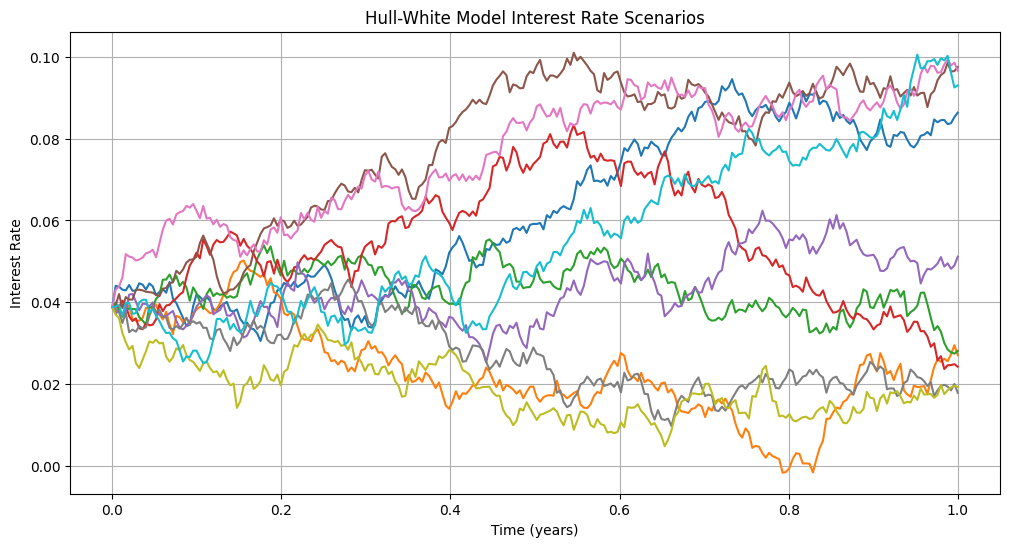

In [ ]:
# Plot a few scenarios
plt.figure(figsize=(12, 6))
for i in range(10):  # Plot 10 scenarios
    plt.plot(time, rates[i])
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
plt.title('Hull-White Model Interest Rate Scenarios')
plt.grid(True)
plt.show()


In [ ]:
# Example use case for the JPM balance sheet
jpm = yf.Ticker('JPM')
jpm_balance_sheet = jpm.balance_sheet
total_liabilities_jpm = jpm_balance_sheet.loc['Total Liabilities Net Minority Interest'][0]
total_assets_jpm = jpm_balance_sheet.loc['Total Assets'][0]

# Calculate NII sensitivity
nii_sensitivities = calculate_nii_sensitivity(rates, total_assets_jpm, total_liabilities_jpm, dt)
print(f"Mean NII sensitivity: {np.mean(nii_sensitivities)}")
print(f"Standard deviation of NII sensitivity: {np.std(nii_sensitivities)}")

# Calculate EVE sensitivity
eve_sensitivities = calculate_eve_sensitivity(rates, total_assets_jpm, total_liabilities_jpm, dt)
print(f"Mean EVE sensitivity: {np.mean(eve_sensitivities)}")
print(f"Standard deviation of EVE sensitivity: {np.std(eve_sensitivities)}")

Mean NII sensitivity: 12784351778.194063
Standard deviation of NII sensitivity: 5652288584.769655
Mean EVE sensitivity: 81033600563966.78
Standard deviation of EVE sensitivity: 535778130327.22943
